In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
import seaborn as sns

In [15]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [16]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [18]:
df.corr()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


In [19]:
df.drop(columns=['availability', 'area_type' , 'society' ] , inplace=True)
df

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [20]:
df.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [25]:
for i in df.columns:
    print(df[i].value_counts())

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK 

In [26]:
df['location'] = df['location'].fillna("Sarjapur Road")
df['size'] = df['size'].fillna('2 BHK')

In [31]:
df['bhk'] = df['size'].str.split(" ").str.get(0).astype(int)

In [32]:
df

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [33]:
df.isna().sum()

location        0
size            0
total_sqft      0
bath           73
balcony       609
price           0
bhk             0
dtype: int64

In [35]:
df.describe()

,bath,balcony,price,bhk
count,13247.000000,12711.000000,13320.000000,13320.000000
mean,2.692610,1.584376,112.565627,2.802778
std,1.341458,0.817263,148.971674,1.294496
min,1.000000,0.000000,8.000000,1.000000
25%,2.000000,1.000000,50.000000,2.000000
50%,2.000000,2.000000,72.000000,3.000000
75%,3.000000,2.000000,120.000000,3.000000
max,40.000000,3.000000,3600.000000,43.000000


In [36]:
df['bath'] = df['bath'].fillna(df['bath'].median())
df['balcony'] = df['balcony'].fillna(df['balcony'].median())

In [38]:
df.drop(columns=['size'] , inplace=True)
df

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,3453,4.0,0.0,231.00,5
13316,Richards Town,3600,5.0,2.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689,4.0,1.0,488.00,4


In [39]:
df.isna().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [40]:
df.corr()

,bath,balcony,price,bhk
bath,1.000000,0.207970,0.454449,0.895786
balcony,0.207970,1.000000,0.124951,0.194358
price,0.454449,0.124951,1.000000,0.398074
bhk,0.895786,0.194358,0.398074,1.000000


<AxesSubplot: xlabel='bath'>

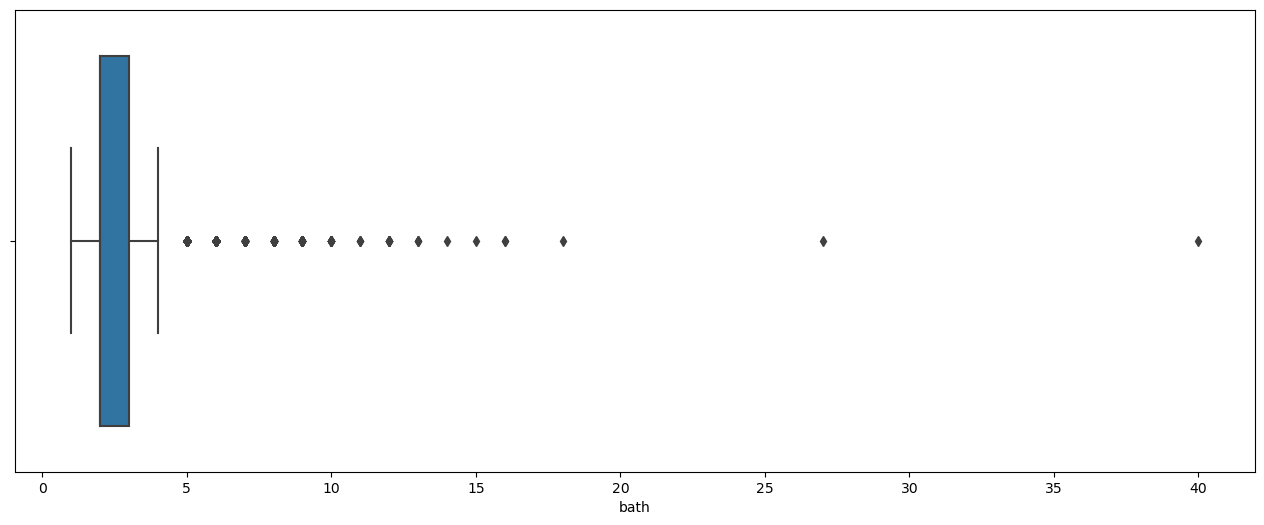

In [50]:
fig = plt.figure(figsize=(16,6))
sns.boxplot(data=df , x=df['bath'])

<AxesSubplot: xlabel='price'>

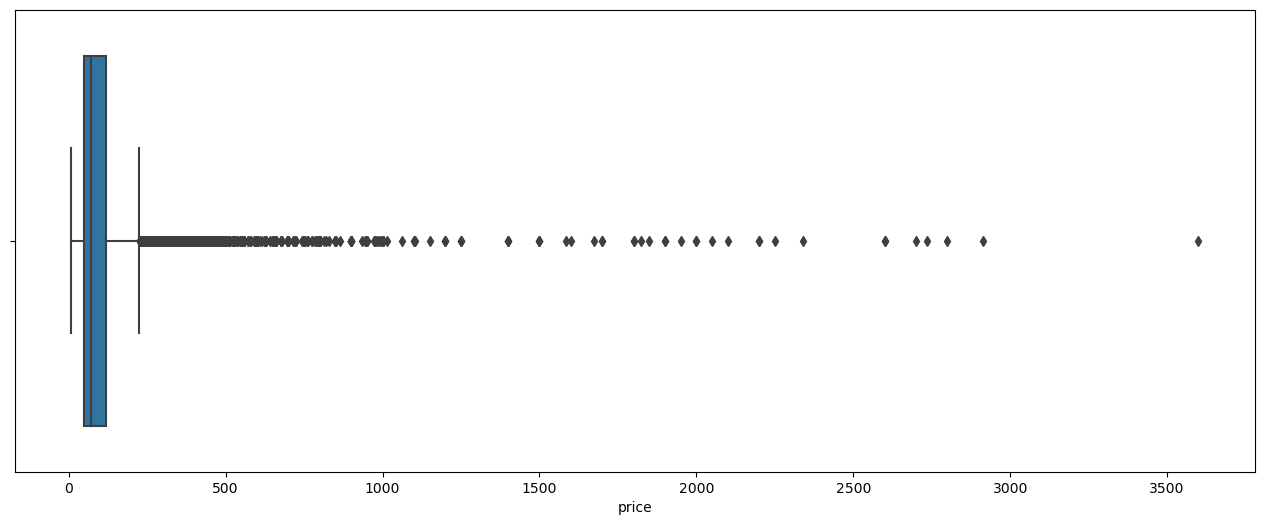

In [51]:
fig = plt.figure(figsize=(16,6))
sns.boxplot(data=df , x=df['price'])

In [56]:
def l_h_finder(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_fench = q1 - 1.5*iqr
    higher_fench = q3 + 1.5*iqr
    return lower_fench , higher_fench

In [57]:
l_h_finder(df['bath'])

(0.5, 4.5)

In [61]:
df1 = df[df['bath'] < 6]
df1

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,3453,4.0,0.0,231.00,5
13316,Richards Town,3600,5.0,2.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689,4.0,1.0,488.00,4


<AxesSubplot: xlabel='bath', ylabel='price'>

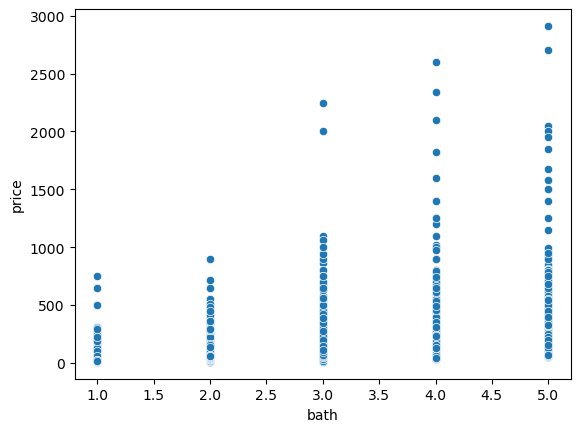

In [62]:
sns.scatterplot(data=df1 , x='bath' , y ='price')

In [79]:
df2 = df1[df1['price'] < 501]

In [80]:
df2.describe()

,bath,balcony,price,bhk
count,12610.000000,12610.000000,12610.000000,12610.000000
mean,2.485250,1.588184,94.275467,2.624504
std,0.879249,0.793664,75.471187,0.888816
min,1.000000,0.000000,8.000000,1.000000
25%,2.000000,1.000000,48.962500,2.000000
50%,2.000000,2.000000,69.000000,3.000000
75%,3.000000,2.000000,110.000000,3.000000
max,5.000000,3.000000,500.000000,9.000000


In [82]:
df2.columns

Index(['location', 'total_sqft', 'bath', 'balcony', 'price', 'bhk'], dtype='object')

In [87]:
def convert_total_sqft(d):
    x = d.split("-")
    if len(x) ==2:
        return (float(x[0]) + float(x[1]))/2
    try:
        return float(d)
    except:
        return None

In [94]:
df2['total_area_in_sqrt'] = df2['total_sqft'].apply(convert_total_sqft)

C:\Users\Vishwajeet\AppData\Local\Temp\ipykernel_11808\4033758660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_area_in_sqrt'] = df2['total_sqft'].apply(convert_total_sqft)


In [97]:
df3 = df.drop(columns=['total_sqft'])

In [98]:
df3.corr()

,bath,balcony,price,bhk,total_area_in_sqrt
bath,1.000000,0.207970,0.454449,0.895786,0.389223
balcony,0.207970,1.000000,0.124951,0.194358,0.154499
price,0.454449,0.124951,1.000000,0.398074,0.575559
bhk,0.895786,0.194358,0.398074,1.000000,0.347455
total_area_in_sqrt,0.389223,0.154499,0.575559,0.347455,1.000000


In [100]:
df3['price_to_sqft'] = df3['price'] *1_00_000 / df3['total_area_in_sqrt']
df3

,location,bath,balcony,price,bhk,total_area_in_sqrt,price_to_sqft
0,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,4.0,0.0,231.00,5,3453.0,6689.834926
13316,Richards Town,5.0,2.0,400.00,4,3600.0,11111.111111
13317,Raja Rajeshwari Nagar,2.0,1.0,60.00,2,1141.0,5258.545136
13318,Padmanabhanagar,4.0,1.0,488.00,4,4689.0,10407.336319


In [101]:
df3.corr()

,bath,balcony,price,bhk,total_area_in_sqrt,price_to_sqft
bath,1.000000,0.207970,0.454449,0.895786,0.389223,0.030923
balcony,0.207970,1.000000,0.124951,0.194358,0.154499,0.009311
price,0.454449,0.124951,1.000000,0.398074,0.575559,0.028406
bhk,0.895786,0.194358,0.398074,1.000000,0.347455,0.030928
total_area_in_sqrt,0.389223,0.154499,0.575559,0.347455,1.000000,-0.008251
price_to_sqft,0.030923,0.009311,0.028406,0.030928,-0.008251,1.000000


In [104]:
df['location'] = df['location'].apply(lambda x:x.strip())
df

,location,total_sqft,bath,balcony,price,bhk,total_area_in_sqrt
0,Electronic City Phase II,1056,2.0,1.0,39.07,2,1056.0
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4,2600.0
2,Uttarahalli,1440,2.0,3.0,62.00,3,1440.0
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3,1521.0
4,Kothanur,1200,2.0,1.0,51.00,2,1200.0
...,...,...,...,...,...,...,...
13315,Whitefield,3453,4.0,0.0,231.00,5,3453.0
13316,Richards Town,3600,5.0,2.0,400.00,4,3600.0
13317,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2,1141.0
13318,Padmanabhanagar,4689,4.0,1.0,488.00,4,4689.0


In [115]:
location_counter =  df['location'].value_counts()

In [117]:
location_less_that_10 = location_counter[location_counter <=10]

In [120]:
df3['location'] = df3['location'].apply(lambda x:'Other' if x in location_less_that_10 else x )

In [123]:
df3['location'] = df3['location'].apply(lambda x:x.strip())

In [124]:
df3

,location,bath,balcony,price,bhk,total_area_in_sqrt,price_to_sqft
0,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,4.0,0.0,231.00,5,3453.0,6689.834926
13316,Other,5.0,2.0,400.00,4,3600.0,11111.111111
13317,Raja Rajeshwari Nagar,2.0,1.0,60.00,2,1141.0,5258.545136
13318,Padmanabhanagar,4.0,1.0,488.00,4,4689.0,10407.336319


In [128]:
df4 =  df3[df['bath'] < 20]

In [145]:
df5 = df4[(df4['total_area_in_sqrt'] / df4['bhk'] >= 400) & (df4['total_area_in_sqrt'] >= 400) ]

In [146]:
df5.describe()

,bath,balcony,price,bhk,total_area_in_sqrt,price_to_sqft
count,11784.000000,11784.000000,11784.000000,11784.00000,11784.000000,11784.000000
mean,2.535642,1.619823,112.015774,2.60667,1623.092095,6180.079393
std,1.038715,0.793807,154.987366,0.93104,1290.365094,4004.261508
min,1.000000,0.000000,8.440000,1.00000,400.000000,267.829813
25%,2.000000,1.000000,50.000000,2.00000,1130.000000,4207.720529
50%,2.000000,2.000000,70.000000,2.00000,1320.000000,5278.775943
75%,3.000000,2.000000,115.000000,3.00000,1725.000000,6800.000000
max,16.000000,3.000000,3600.000000,16.00000,52272.000000,176470.588235


In [148]:
df5.corr()

,bath,balcony,price,bhk,total_area_in_sqrt,price_to_sqft
bath,1.000000,0.247714,0.535970,0.866920,0.553760,0.311606
balcony,0.247714,1.000000,0.120143,0.266396,0.154335,0.035792
price,0.535970,0.120143,1.000000,0.492216,0.586004,0.707474
bhk,0.866920,0.266396,0.492216,1.000000,0.552440,0.272840
total_area_in_sqrt,0.553760,0.154335,0.586004,0.552440,1.000000,0.226601
price_to_sqft,0.311606,0.035792,0.707474,0.272840,0.226601,1.000000


In [157]:
def remove_outlier_sqft(data):
    d_df = pd.DataFrame()
    for i , sub in data.groupby('location'):
        m = np.mean(sub['price_to_sqft'])
        s = np.std(sub['price_to_sqft'])
        c_df = sub[(sub['price_to_sqft'] >= (m-s)) & (sub['price_to_sqft'] <= (m+s))]
        d_df =  pd.concat([d_df , c_df] , ignore_index=True)
    return d_df
df5 = remove_outlier_sqft(df5)
    

In [158]:
df5

,location,bath,balcony,price,bhk,total_area_in_sqrt,price_to_sqft
0,1st Block Jayanagar,4.0,1.0,428.00,4,2850.0,15017.543860
1,1st Block Jayanagar,3.0,2.0,194.00,3,1630.0,11901.840491
2,1st Block Jayanagar,2.0,3.0,235.00,3,1875.0,12533.333333
3,1st Block Jayanagar,2.0,0.0,130.00,3,1200.0,10833.333333
4,1st Block Jayanagar,2.0,2.0,148.00,2,1235.0,11983.805668
...,...,...,...,...,...,...,...
9548,Yeshwanthpur,3.0,3.0,138.00,3,2503.0,5513.383939
9549,Yeshwanthpur,3.0,3.0,135.00,3,1855.0,7277.628032
9550,Yeshwanthpur,3.0,2.0,92.13,3,1675.0,5500.298507
9551,south,2.0,0.0,480.00,3,2400.0,20000.000000


In [161]:
def outlier_remover(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location') :
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                "mean" : np.mean(bhk_df['price_to_sqft']),
                "std":np.std(bhk_df['price_to_sqft']),
                "count" : bhk_df['price_to_sqft'].shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats  = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices =  np.append(exclude_indices , bhk_df[bhk_df['price_to_sqft'] < stats['mean']].index.values)
    return df.drop(exclude_indices, axis ='index')
            

In [163]:
df6 = outlier_remover(df5)

In [167]:
df6.drop(columns=['price_to_sqft'] , inplace=True)
df6

,location,bath,balcony,price,bhk,total_area_in_sqrt
0,1st Block Jayanagar,4.0,1.0,428.0,4,2850.0
1,1st Block Jayanagar,3.0,2.0,194.0,3,1630.0
2,1st Block Jayanagar,2.0,3.0,235.0,3,1875.0
3,1st Block Jayanagar,2.0,0.0,130.0,3,1200.0
4,1st Block Jayanagar,2.0,2.0,148.0,2,1235.0
...,...,...,...,...,...,...
9542,Yeshwanthpur,3.0,3.0,108.0,3,1692.0
9544,Yeshwanthpur,5.0,2.0,185.0,6,2500.0
9549,Yeshwanthpur,3.0,3.0,135.0,3,1855.0
9551,south,2.0,0.0,480.0,3,2400.0


In [168]:
df6.describe()

,bath,balcony,price,bhk,total_area_in_sqrt
count,6908.000000,6908.000000,6908.000000,6908.000000,6908.000000
mean,2.437319,1.585698,99.861681,2.474812,1518.217601
std,0.988559,0.780376,94.645833,0.892078,878.396060
min,1.000000,0.000000,10.000000,1.000000,400.000000
25%,2.000000,1.000000,51.000000,2.000000,1100.000000
50%,2.000000,2.000000,74.000000,2.000000,1278.000000
75%,3.000000,2.000000,112.000000,3.000000,1691.250000
max,16.000000,3.000000,2200.000000,16.000000,30000.000000


In [169]:
df6.to_csv("clean_housing_dataset.csv")